In [1]:
import cv2

In [2]:
print(cv2.__version__)

4.12.0


In [3]:
import numpy as np
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
import matplotlib.pyplot as plt


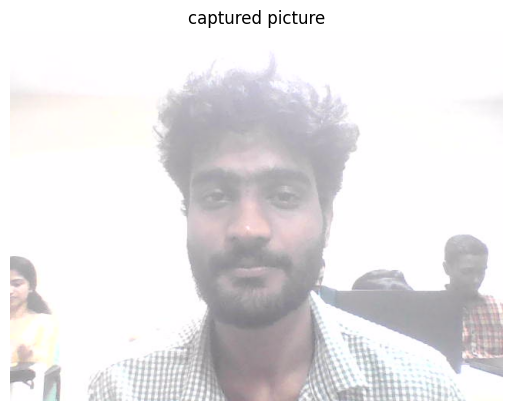

In [19]:
cap = cv2.VideoCapture(0)
ret,frame = cap.read()
cap.release()

if not ret:
    raise Exception("couldnt capture image")

image = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis("off")
plt.savefig("captured.png")
plt.title("captured picture")
plt.show()


In [20]:
image = cv2.resize(image,(200,200))

h,w,c = image.shape
pixels = image.reshape(-1,3)


In [21]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
pixels_scaled = scalar.fit_transform(pixels)

In [ ]:
def segment_image(model, X, pixels, downscale=None):
    if downscale:
        img_small = cv2.resize(image, downscale)
        small_pixels = img_small.reshape(-1, 3)
        small_scaled = StandardScaler().fit_transform(small_pixels)
        labels_small = model.fit_predict(small_scaled)

        labels_full = cv2.resize(labels_small.reshape(downscale), (w, h), interpolation=cv2.INTER_NEAREST).flatten()
    else:
        labels_full = model.fit_predict(X)

    segmented_img = np.copy(pixels)
    mask_label = 1  
    segmented_img[labels_full == mask_label] = [255, 255, 255]
    # segmented_img[labels_full == -1] = [255, 0, 0] 
    return segmented_img.reshape(h, w, c)


In [23]:
kmeans_segmented = segment_image(KMeans(n_clusters=2, random_state=42),pixels_scaled,pixels)


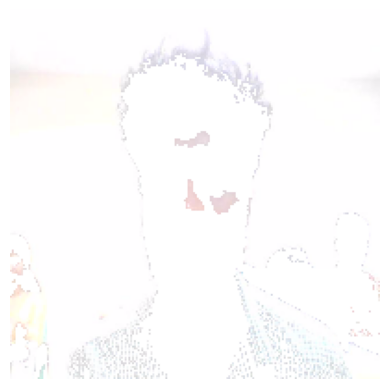

In [24]:
plt.imshow(kmeans_segmented)
plt.axis("off")
plt.show()


In [28]:
agg_segmented = segment_image(
    AgglomerativeClustering(n_clusters=2),
    pixels_scaled,
    pixels,
    downscale=(120,120)  
)

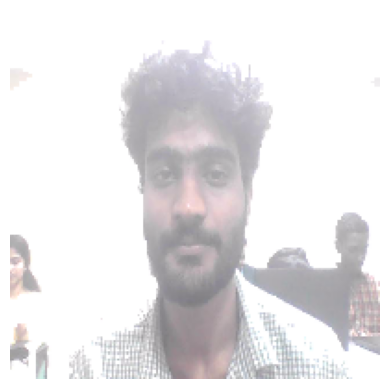

In [29]:
plt.imshow(agg_segmented)
plt.axis("off")
plt.show()

In [32]:
dbscan_segmented = segment_image(
    DBSCAN(eps=0.8, min_samples=50),
    pixels_scaled,
    pixels,
    downscale=(200, 200)
)

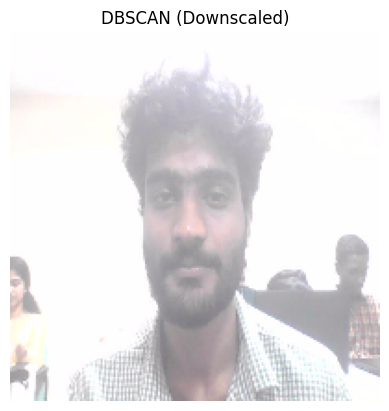

In [33]:
plt.imshow(dbscan_segmented)
plt.axis("off")
plt.title("DBSCAN (Downscaled)")
plt.show()